In [1]:
import os
import pandas
import numpy as np

import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression


In [2]:
dataset = pandas.read_csv(r"C:\Users\cicil\Downloads\google_review_ratings.csv")

In [3]:
dataset.head()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0   
1         0.5          0.0          0.5          0.0          0.0   
2         0.5          0.0          0.5          0.0          0.0   
3         0.5          0.0          0.5          0.0          0.0   
4         0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  Unnamed: 25  
0          0.0          0.0          0.0          NaN  
1          0.0          0.0          0.0          NaN  
2          0.0          0.0          0.0          NaN  
3          0.0          0.0          0.0          NaN  
4          0.0          0.0          0.0          NaN  

[5 rows x 26 columns]

In [4]:
dataset.tail()

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
5451  User 5452        0.91        5.00        4.00        2.79        2.77   
5452  User 5453        0.93        5.00        4.02        2.79        2.78   
5453  User 5454        0.94        5.00        4.03        2.80        2.78   
5454  User 5455        0.95        4.05        4.05        2.81        2.79   
5455  User 5456        0.95        4.07        5.00        2.82        2.80   

      Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
5451        2.57        2.43        1.09        1.77  ...         0.66   
5452        2.57        1.77        1.07        1.76  ...         0.65   
5453        2.57        1.75        1.05        1.75  ...         0.65   
5454        2.44        1.76        1.03        1.74  ...         0.64   
5455        2.57        2.42        1.02        1.74  ...         0.64   

     Category 17  Category 18  Category 19  Category 20  Category 21  \
5451        0.65         0.66         0.69         5.00         1.05   
5452        0.64         0.65         1.59         1.62         1.06   
5453        0.63         0.64         0.74         5.00         1.07   
5454        0.63         0.64         0.75         5.00         1.08   
5455        0.62         0.63         0.78         5.00         1.08   

      Category 22  Category 23  Category 24  Unnamed: 25  
5451          5.0          5.0         1.56          NaN  
5452          5.0          5.0         1.09          NaN  
5453          5.0          5.0         1.11          NaN  
5454          5.0          5.0         1.12          NaN  
5455          5.0          5.0         1.17          NaN  

[5 rows x 26 columns]

In [5]:
dataset.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
cols = ['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10','Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24']

dataset.rename(columns = {cols[1]: 'Churches', cols[2]: 'Resorts', cols[3]: 'Beaches', cols[4]: 'Parks', cols[5]: 'Theaters', cols[6]: 'Musuems', cols[7]: 'Malls', cols[8]: 'Zoo', cols[9]: 'Restaurants', cols[10]: 'Pubs', cols[11]: 'Local_Services', cols[12]: 'Burger_Shops', cols[13]: 'Hotels', cols[14]: 'Juice_Bars', cols[15]: 'Art_Galleries', cols[16]: 'Dance_Clubs', cols[17]: 'Swimming_Pools', cols[18]: 'Gyms', cols[19]: 'Bakeries', cols[20]: 'Beauty_Spa', cols[21]: 'Cafe', cols[22]: 'View_Points', cols[23]: 'Monuments', cols[24]: 'Garden'}, inplace = True)

In [7]:
dataset.describe()

Churches      Resorts      Beaches        Parks     Theaters  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

          Musuems        Malls          Zoo  Restaurants         Pubs  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min       1.11000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.79000     1.930000     1.620000     1.800000     1.640000  ...   
50%       2.68000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.84000     5.000000     3.190000     5.000000     3.530000  ...   
max       5.00000     5.000000     5.000000     5.000000     5.000000  ...   

       Dance_Clubs  Swimming_Pools         Gyms     Bakeries   Beauty_Spa  \
count  5456.000000     5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.192801        0.949203     0.822414     0.969811     1.000071   
std       1.107005        0.973536     0.947911     1.203972     1.193891   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.690000        0.580000     0.530000     0.520000     0.540000   
50%       0.800000        0.740000     0.690000     0.690000     0.690000   
75%       1.160000        0.910000     0.840000     0.860000     0.860000   
max       5.000000        5.000000     5.000000     5.000000     5.000000   

              Cafe  View_Points    Monuments       Garden  Unnamed: 25  
count  5456.000000  5456.000000  5456.000000  5455.000000     2.000000  
mean      0.965838     1.750537     1.531453     1.560755     1.810000  
std       0.929853     1.598734     1.316889     1.171756     1.088944  
min       0.000000     0.000000     0.000000     0.000000     1.040000  
25%       0.570000     0.740000     0.790000     0.880000     1.425000  
50%       0.760000     1.030000     1.070000     1.290000     1.810000  
75%       1.000000     2.070000     1.560000     1.660000     2.195000  
max       5.000000     5.000000     5.000000     5.000000     2.580000  

[8 rows x 24 columns]

In [8]:
dataset.groupby(dataset['Churches']).size()

Churches
0.00    195
0.50     10
0.51     17
0.52     17
0.53     12
       ... 
4.78      1
4.85      6
4.86      1
4.87      1
5.00     67
Length: 281, dtype: int64

In [9]:
dataset.groupby(dataset['Resorts']).size()

Resorts
0.00     90
0.50     10
0.51     20
0.52      8
0.53     17
       ... 
4.92      5
4.93      4
4.94      4
4.95      3
5.00    880
Length: 340, dtype: int64

In [10]:
dataset.groupby(dataset['Beaches']).size()

Beaches
0.00      4
0.50      2
0.52      7
0.53      3
0.54      1
       ... 
4.93      4
4.94      2
4.95      4
4.96      2
5.00    813
Length: 328, dtype: int64

In [11]:
dataset.groupby(dataset['Parks']).size()

Parks
0.83       1
0.85       1
0.86       1
0.88       1
0.90       1
        ... 
4.93       2
4.94       5
4.96       2
4.97       2
5.00    1067
Length: 293, dtype: int64

In [12]:
dataset.groupby(dataset['Theaters']).size()

Theaters
1.12       5
1.13       4
1.14       9
1.15       6
1.16       4
        ... 
4.95       6
4.96       2
4.97       1
4.98       8
5.00    1234
Length: 316, dtype: int64

In [13]:
dataset.groupby(dataset['Dance_Clubs']).size()

Dance_Clubs
0.00    112
0.50      6
0.51     59
0.52     36
0.53     85
       ... 
4.67      1
4.68      2
4.69      2
4.70      1
5.00    335
Length: 221, dtype: int64

In [14]:
dataset.groupby(dataset['Juice_Bars']).size()

Juice_Bars
0.76       9
0.77      21
0.78     113
0.79     109
0.80     102
        ... 
4.90       2
4.97       1
4.98       5
4.99       2
5.00    1154
Length: 260, dtype: int64

In [15]:
dataset.groupby(dataset['Restaurants']).size()

Restaurants
0.84       1
0.85       1
0.86       2
0.87       3
0.88       7
        ... 
4.93       3
4.94       5
4.95       8
4.96       5
5.00    1474
Length: 353, dtype: int64

In [16]:
dataset.groupby(dataset['Musuems']).size()

Musuems
1.11       2
1.12       5
1.13       3
1.14      16
1.15       6
        ... 
4.83       2
4.96       1
4.97       1
4.98       1
5.00    1045
Length: 310, dtype: int64

In [17]:
dataset.groupby(dataset['Resorts']).size()

Resorts
0.00     90
0.50     10
0.51     20
0.52      8
0.53     17
       ... 
4.92      5
4.93      4
4.94      4
4.95      3
5.00    880
Length: 340, dtype: int64

In [18]:
dataset.groupby(dataset['Parks']).size()

Parks
0.83       1
0.85       1
0.86       1
0.88       1
0.90       1
        ... 
4.93       2
4.94       5
4.96       2
4.97       2
5.00    1067
Length: 293, dtype: int64

In [19]:
dataset.shape

(5456, 26)

In [20]:
dataset.describe()

Churches      Resorts      Beaches        Parks     Theaters  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

          Musuems        Malls          Zoo  Restaurants         Pubs  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...   
min       1.11000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.79000     1.930000     1.620000     1.800000     1.640000  ...   
50%       2.68000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.84000     5.000000     3.190000     5.000000     3.530000  ...   
max       5.00000     5.000000     5.000000     5.000000     5.000000  ...   

       Dance_Clubs  Swimming_Pools         Gyms     Bakeries   Beauty_Spa  \
count  5456.000000     5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.192801        0.949203     0.822414     0.969811     1.000071   
std       1.107005        0.973536     0.947911     1.203972     1.193891   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.690000        0.580000     0.530000     0.520000     0.540000   
50%       0.800000        0.740000     0.690000     0.690000     0.690000   
75%       1.160000        0.910000     0.840000     0.860000     0.860000   
max       5.000000        5.000000     5.000000     5.000000     5.000000   

              Cafe  View_Points    Monuments       Garden  Unnamed: 25  
count  5456.000000  5456.000000  5456.000000  5455.000000     2.000000  
mean      0.965838     1.750537     1.531453     1.560755     1.810000  
std       0.929853     1.598734     1.316889     1.171756     1.088944  
min       0.000000     0.000000     0.000000     0.000000     1.040000  
25%       0.570000     0.740000     0.790000     0.880000     1.425000  
50%       0.760000     1.030000     1.070000     1.290000     1.810000  
75%       1.000000     2.070000     1.560000     1.660000     2.195000  
max       5.000000     5.000000     5.000000     5.000000     2.580000  

[8 rows x 24 columns]

<AxesSubplot:>

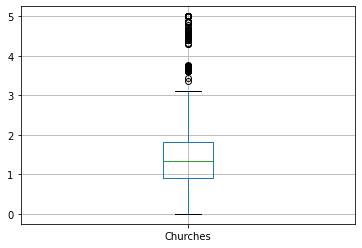

In [21]:
dataset.boxplot('Churches')

Missing Value - Identification

In [22]:
# No. of Missing Values in the dataframe...
dataset.isnull()

User  Churches  Resorts  Beaches  Parks  Theaters  Musuems  Malls  \
0     False     False    False    False  False     False    False  False   
1     False     False    False    False  False     False    False  False   
2     False     False    False    False  False     False    False  False   
3     False     False    False    False  False     False    False  False   
4     False     False    False    False  False     False    False  False   
...     ...       ...      ...      ...    ...       ...      ...    ...   
5451  False     False    False    False  False     False    False  False   
5452  False     False    False    False  False     False    False  False   
5453  False     False    False    False  False     False    False  False   
5454  False     False    False    False  False     False    False  False   
5455  False     False    False    False  False     False    False  False   

        Zoo  Restaurants  ...  Dance_Clubs  Swimming_Pools   Gyms  Bakeries  \
0     False        False  ...        False           False  False     False   
1     False        False  ...        False           False  False     False   
2     False        False  ...        False           False  False     False   
3     False        False  ...        False           False  False     False   
4     False        False  ...        False           False  False     False   
...     ...          ...  ...          ...             ...    ...       ...   
5451  False        False  ...        False           False  False     False   
5452  False        False  ...        False           False  False     False   
5453  False        False  ...        False           False  False     False   
5454  False        False  ...        False           False  False     False   
5455  False        False  ...        False           False  False     False   

      Beauty_Spa   Cafe  View_Points  Monuments  Garden  Unnamed: 25  
0          False  False        False      False   False         True  
1          False  False        False      False   False         True  
2          False  False        False      False   False         True  
3          False  False        False      False   False         True  
4          False  False        False      False   False         True  
...          ...    ...          ...        ...     ...          ...  
5451       False  False        False      False   False         True  
5452       False  False        False      False   False         True  
5453       False  False        False      False   False         True  
5454       False  False        False      False   False         True  
5455       False  False        False      False   False         True  

[5456 rows x 26 columns]

In [23]:
# Count the number of missing values in each column
dataset.isnull().sum()

User                 0
Churches             0
Resorts              0
Beaches              0
Parks                0
Theaters             0
Musuems              0
Malls                0
Zoo                  0
Restaurants          0
Pubs                 0
Local_Services       0
Burger_Shops         1
Hotels               0
Juice_Bars           0
Art_Galleries        0
Dance_Clubs          0
Swimming_Pools       0
Gyms                 0
Bakeries             0
Beauty_Spa           0
Cafe                 0
View_Points          0
Monuments            0
Garden               1
Unnamed: 25       5454
dtype: int64

Outliers - Identification

In [24]:
# No. of outliers in the considered dataset...
dataset[dataset.Churches > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [25]:
dataset[dataset.Resorts > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [26]:
dataset[dataset.Beaches > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [27]:
dataset[dataset.Parks > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [28]:
dataset[dataset.Theaters > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [29]:
dataset[dataset.Musuems > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [30]:
dataset[dataset.Malls > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [31]:
dataset[dataset.Zoo > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [32]:
dataset[dataset.Restaurants > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [33]:
dataset[dataset.Parks > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [34]:
dataset[dataset.Burger_Shops > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [35]:
dataset[dataset.Hotels > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [36]:
dataset[dataset.Juice_Bars > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [37]:
dataset[dataset.Art_Galleries > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [38]:
dataset[dataset.Dance_Clubs > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [39]:
dataset[dataset.Swimming_Pools > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [40]:
dataset[dataset.Gyms> 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [41]:
dataset[dataset.Bakeries > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [42]:
dataset[dataset.Beauty_Spa > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [43]:
dataset[dataset.Cafe > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [44]:
dataset[dataset.View_Points > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [45]:
dataset[dataset.Monuments > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

In [46]:
dataset[dataset.Garden > 5]

Empty DataFrame
Columns: [User, Churches, Resorts, Beaches, Parks, Theaters, Musuems, Malls, Zoo, Restaurants, Pubs, Local_Services, Burger_Shops, Hotels, Juice_Bars, Art_Galleries, Dance_Clubs, Swimming_Pools, Gyms, Bakeries, Beauty_Spa, Cafe, View_Points, Monuments, Garden, Unnamed: 25]
Index: []

[0 rows x 26 columns]

Concl: No outliers in our dataset

Droping Columns with 90% of empty space

In [47]:
threshold = len(dataset)* 0.1
threshold

545.6

In [48]:
dataset.dropna(thresh = threshold, axis = 1, inplace = True)

In [50]:
y = dataset.iloc[:, 0].values
x = dataset.iloc[:, 1: 23].values

In [51]:
x

array([[0.0, 0.0, 3.63, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 3.63, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 3.63, ..., 0.0, 0.0, 0.0],
       ...,
       [0.94, 5.0, 4.03, ..., 5.0, 1.07, 5.0],
       [0.95, 4.05, 4.05, ..., 5.0, 1.08, 5.0],
       [0.95, 4.07, 5.0, ..., 5.0, 1.08, 5.0]], dtype=object)

In [52]:
y

array(['User 1', 'User 2', 'User 3', ..., 'User 5454', 'User 5455',
       'User 5456'], dtype=object)

In [53]:
samp1 = dataset.iloc[:,1].values
print(samp1)

[0.   0.   0.   ... 0.94 0.95 0.95]


In [54]:
np.mean(samp1)

1.4557203079178886

In [55]:
samp2 = dataset.iloc[:,2].values

In [56]:
np.mean(samp2)

2.3197067448680353

In [57]:
samp3 = dataset.iloc[:,3].values
np.mean(samp3)

2.4893310117302057

In [58]:
samp4 = dataset.iloc[:,4].values
np.mean(samp4)

2.7968859970674487

In [59]:
samp5 = dataset.iloc[:,5].values
np.mean(samp5)

2.958940615835777

In [60]:
samp6 = dataset.iloc[:,6].values
np.mean(samp6)

2.8934897360703813

In [61]:
samp7 = dataset.iloc[:,7].values
np.mean(samp7)

3.3513947947214073

In [62]:
samp8 = dataset.iloc[:,8].values
np.mean(samp8)

2.5407954545454543

In [63]:
samp9 = dataset.iloc[:,9].values
np.mean(samp9)

3.1260190615835772

In [64]:
samp10 = dataset.iloc[:,10].values
np.mean(samp10)

2.8327291055718473

In [65]:
samp12 = dataset.iloc[:,12].values
np.mean(samp12)

nan

In [66]:
samp13 = dataset.iloc[:,13].values
np.mean(samp13)

2.1255113636363636

In [67]:
samp14 = dataset.iloc[:,14].values
np.mean(samp14)

2.1908614369501467

In [68]:
samp15 = dataset.iloc[:,15].values
np.mean(samp15)

2.2065725806451617

In [69]:
samp16 = dataset.iloc[:,16].values
np.mean(samp16)

1.192800586510264

In [70]:
samp17 = dataset.iloc[:,17].values
np.mean(samp17)

0.9492027126099707

In [71]:
samp18 = dataset.iloc[:,18].values
np.mean(samp18)

0.8224138563049853

In [72]:
samp19 = dataset.iloc[:,19].values
np.mean(samp19)

0.9698112170087977

In [73]:
samp20 = dataset.iloc[:,20].values
np.mean(samp20)

1.0000714809384166

In [74]:
samp21 = dataset.iloc[:,21].values
np.mean(samp21)

0.9658376099706746

In [75]:
samp22 = dataset.iloc[:,22].values
np.mean(samp22)

1.7505370234604105

In [76]:
samp23 = dataset.iloc[:,23].values
np.mean(samp23)

1.5314534457478006